<a href="https://colab.research.google.com/github/SoshJam/Jove-CS3100-UofU/blob/master/For_CS3100_Fall2024/02_Basic_DFA/ASSIGNMENT-2/u1431380_asg02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# If you want to clear outputs for a "fresh look", go to Edit and hit "clear outputs"
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True

if OWN_INSTALL:

  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',
                   '../../../..',  '../../../../3rdparty',
                   '../../..',     '../../../3rdparty',
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --

from jove.LangDef   import *  #-- mainly for nthnumeric
from jove.Def_md2mc import *  #-- for md2mc
from jove.Def_DFA   import *  #-- for all DFA functions
from jove.DotBashers import * #-- for dotObj_dfa

from jove.Def_NFA import *
from jove.Def_RE2NFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 6606, done.
remote: Counting objects: 100% (1972/1972), done.
remote: Compressing objects: 100% (746/746), done.
remote: Total 6606 (delta 1200), reused 1901 (delta 1146), pack-reused 4634 (from 1)
Receiving objects: 100% (6606/6606), 10.53 MiB | 15.45 MiB/s, done.
Resolving deltas: 100% (4205/4205), done.
You may use any of these help commands:
help(lphi)
help(lunit)
help(lcat)
help(lexp)
help(lunion)
help(lstar)
help(srev)
help(lrev)
help(shomo)
help(lhomo)
help(powset)
help(lint)
help(lsymdiff)
help(lminus)
help(lissubset)
help(lissuperset)
help(lcomplem)
help(product)
help(nthnumeric)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help c

# SUBMISSION REQUIREMENTS
* Finish your work to your satisfaction
* Restart and run all the cell, *making sure that no cells are kept hidden*
* Download the ipynb and submit
* If we have issues converting your ipynb to a PDF, we will be contacting you.
  (Piazza posting @56_f1 is related)

## OVERVIEW OF ALL QUESTIONS (points subject to slight changes):

* Question 1 a,b,c,d,e (35%, GH) divided  across 1a, 1b, 1c, 1d and 1e as below. For 1a, the parts i, ii, and iii can be quickly "eye-ball checked" and graded.

 - a: (15%)
   - i.   - Define Universe (5%)
   - ii.  - Define L_eq and cursory check (5%)
   - iii. - Define L_neq and cursory check (5%)
 - b:  (5%)   - L_eq and L_neq make up the universe
 - c:  (5%)   - Identify the Missing_Sublanguage by thinking about it. Then write a Python definition to define it
 - d:  (5%)  - Define the Missing_Sublanguage mathematically using language operations
 - e:  (5%)   - Check that the union of L_eq, L_neq and Missing_Sublanguage gives you back the Universe

* Question 1 (10%, ST)
  - f: Define a DFA for the missing language

* Question 2 (25%, ST)
  - a - DFA_Ends010 defined (10 pts)
  - b - DFA_Not_Ends010 defined (10 pts)
  - c - OR the above two and get back the Universe (5 pts)

* Question 2 (30%, AK)
  - d - Mod5 DFA (10 pts)
  - e - Intersect with Ends010 (5 pts)
  - f - Find out the number of states before minimization (5 pts)
  - g - Minimize (5 pts)
  - h - How many states in minimized DFA (2 pts)
  - i - Which states got eliminated? (3 pts)


* (5%, GH) for neat and easy-to-grade answers

-----------------

## Question 1.

Consider the language
    
$$ L_{eq} = \{ w\in \Sigma^{*}_{6}\;:\;  w\; is\; a\; string\; of\; the\; form\; 0^i 1^j\; where\; i=j\}$$  

_Note:_ We could have written it as $\{ w\in \Sigma^{*}_{6}\;:\;  w\; is\; a\; string\; of\; the\; form\; 0^i 1^i\}$. We define it the way we do so that it resemble the $L_{neq}$ definition below.  _End of Note._

Now consider a similar-looking language $L_{neq}$
    
$$ L_{neq} = \{ w\in \Sigma^{*}_{6}\;:\; w\; is\; a\; string\; of\; the\; form\; 0^i 1^j\; where\; i\neq j\}$$

Your task is to explore whether $L_{eq}$ and $L_{neq}$ are complements, i.e. whether $L_{eq} = \overline{L_{neq}}$. We will be working the universe $\Sigma^{*}_{6}$, and $\Sigma=\{0,1\}$.

## 1(a): Defining the Universe explicitly, and then the languages.

😃

### 1(a)(i) The Universe part

In [3]:
# Define Sigma
# Sigma = ...your answer...
# ---
#

Sigma = { '0', '1' }

# Define the universe from which the "w" comes
# Universe ...your answer...
#
Universe = lstar(Sigma, 6)

# Evaluate and print, just to be sure
print('Universe =', Universe)

Universe = {'011101', '000101', '', '10011', '10110', '001111', '11111', '01001', '011', '101', '110100', '11010', '0001', '111111', '00010', '101000', '010110', '111', '111110', '000001', '101011', '001001', '1011', '10101', '01', '000000', '001110', '110001', '010000', '010111', '00011', '00111', '100011', '10', '100111', '101010', '000111', '001000', '1100', '0100', '111010', '101110', '000110', '011011', '100001', '011100', '010001', '100100', '1110', '001', '101100', '011000', '00100', '0110', '11110', '00001', '01101', '110000', '00110', '1101', '0011', '10000', '11000', '0000', '000100', '100', '111000', '010', '11100', '010010', '01010', '0010', '1000', '10001', '001100', '00000', '0101', '110', '010101', '110101', '011111', '000010', '111011', '00101', '100010', '110110', '100101', '11101', '101001', '000', '10100', '001010', '01110', '1010', '000011', '001011', '0111', '111001', '00', '011001', '100000', '111101', '01111', '100110', '110010', '10010', '110011', '01000', '1001

😃

### 1(a)(ii) The Leq part and double-checking its contents

In [4]:
# Define L_eq in Python

L_eq = set( '0' * i + '1' * j for i in range(0,7) for j in range (0,7) if i == j and i + j <= 6 )

# Just to double-check that L_eq is correct, evaluate Universe - L_eq and eyeball its contents

print('Universe - L_eq =', Universe - L_eq)

Universe - L_eq = {'011101', '000101', '10011', '10110', '001111', '11111', '01001', '011', '101', '110100', '11010', '0001', '111111', '00010', '101000', '010110', '111', '111110', '000001', '101011', '001001', '1011', '10101', '000000', '001110', '110001', '010000', '010111', '00011', '00111', '100011', '10', '100111', '101010', '001000', '1100', '0100', '111010', '101110', '000110', '011011', '100001', '011100', '010001', '100100', '1110', '001', '101100', '011000', '00100', '0110', '11110', '00001', '01101', '110000', '00110', '1101', '10000', '11000', '0000', '000100', '100', '111000', '010', '11100', '010010', '01010', '0010', '1000', '10001', '001100', '00000', '0101', '110', '010101', '110101', '011111', '000010', '111011', '00101', '100010', '110110', '100101', '11101', '101001', '000', '10100', '001010', '01110', '1010', '000011', '001011', '0111', '111001', '00', '011001', '100000', '111101', '01111', '100110', '110010', '10010', '110011', '01000', '1001', '001101', '11001',

😃

### 1(a)(iii) The L_Neq part and double-checking its contents

In [5]:
# Define L_neq in Python

L_neq = set( '0' * i + '1' * j for i in range(0,7) for j in range (0,7) if i != j and i + j <= 6 )


# Just to double-check that L_neq is correct, evaluate Universe - L_neq and eyeball its contents

print('Universe - L_neq =', Universe - L_neq)


Universe - L_neq = {'011101', '000101', '', '10011', '10110', '01001', '101', '110100', '11010', '00010', '101000', '010110', '111110', '101011', '001001', '1011', '10101', '01', '001110', '110001', '010000', '010111', '100011', '10', '100111', '101010', '000111', '001000', '1100', '0100', '111010', '101110', '000110', '011011', '100001', '011100', '010001', '100100', '1110', '101100', '011000', '00100', '0110', '11110', '01101', '110000', '00110', '1101', '0011', '10000', '11000', '000100', '100', '111000', '010', '11100', '010010', '01010', '0010', '1000', '10001', '001100', '0101', '110', '010101', '110101', '000010', '111011', '00101', '100010', '110110', '100101', '11101', '101001', '10100', '001010', '01110', '1010', '001011', '111001', '011001', '100000', '111101', '100110', '110010', '10010', '110011', '01000', '1001', '001101', '11001', '101101', '010011', '011010', '111100', '01100', '01011', '010100', '101111', '110111', '011110', '10111', '11011'}


###Part 1(b): Use any automated approach (i.e. by not walking through each and every string manually) to confirm whether L_eq and L_neq together make up the Universe.



 Fill the code-cell below to compute the union of $L_{eq}$ and $L_{neq}$ using Jove's lunion function. Compare the result to the universe. Let the comparison result be called __Matches__.

😃

In [6]:
# Code for 1(b)

Union = lunion( L_eq, L_neq )

Matches =  Union == Universe

if (Matches):
    print('Yes,  L_eq and L_neq together make up the universe')
else:
    print('No,  L_eq and L_neq together DO NOT make up the universe')


No,  L_eq and L_neq together DO NOT make up the universe


## 1(c)

If you think they make-up the universe, stop and write a detailed proof that they do make-up the Universe.

Else, find the missing strings by defining a "Missing_Sublanguage" explicitly. That is, by thinking about the problem, write a piece of code that goes as follows.

Some_definition1 = "..."

Some_definition2 = "..."

Missing_Sublanguage = "...one or more lines of Python code that help define the Missing_Sublanguage by using Some_definition1, Some_definition2, etc"

A few more  *OPTIONAL* hints: Just focus on a key property of *ALL* missing strings. What do they look like? Can you express them through a few "lcat" based concatenations as "Any missing string has THIS followed by THIS followed by THIS ..." . Then make up the THIS followed by via something like this:


lcat(ONE_PIECE, lcat(ANOTHER_PIECE, lcat( STILL_ANOTHER_Piece,...)))
where you can introduce the ONE_PIECE via your "Some_definition"s.

You can even get a larger-than-necessary set of missing pieces first, and then trim them down. This is another hint.


All_Missing_Strings_With_Some_Possibly_Longer = lcat(ONE_PIECE, lcat(ANOTHER_PIECE, lcat( STILL_ANOTHER_Piece,...)))

Missing_Sublanguage = {s : All_Missing_Strings_With_Some_Possibly_Longer if CONDITION}

where CONDITION helps trim down the 's'.

😃

In [7]:
# Code for 1(c)

# Well the problem with L_eq and L_neq is that they only considered strings of the form { 0^i 1^j }, so anything with a 1 followed by a 0 anywhere in the string should be in the missing language.
# To cover all our bases, we can just use (0+1)* 10 (0+1)*.
# The code is restricted to the universe Sigma*6 so we have to get more creative with the set construction.

# If there is a 10 in the string, the other 4 characters can be anything and go anywhere in it. It would be helpful to define the smaller degrees of Sigma*

SS4 = lstar(Sigma, 4)
SS3 = lstar(Sigma, 3)
SS2 = lstar(Sigma, 2)
SS1 = lstar(Sigma, 1)
SS0 = set([''])

# For example, S4 = Sigma*4 - Sigma*3 = all strings {0,1}* of length exactly 4
S4 = SS4 - SS3
S3 = SS3 - SS2
S2 = SS2 - SS1
S1 = SS1 - SS0
S0 = SS0

# Ls[i] has all strings over {0,1} with length exactly i
Ls = [ S0, S1, S2, S3, S4 ]

# Now we just concatenate these all around our target string, making sure the total length is 6
sub_sublanguages = [ lcat( Ls[i], lcat( set(['10']), Ls[j] ) ) for i in range(0,5) for j in range(0,5) if i+2+j <= 6 ]

# Now we just combine them all into one language
Missing_Sublanguage = set()

for ssl in sub_sublanguages:
  Missing_Sublanguage = Missing_Sublanguage.union(ssl)

print('Missing_Sublanguage = ', Missing_Sublanguage)

Missing_Sublanguage =  {'011101', '000101', '10011', '10110', '01001', '101', '110100', '11010', '00010', '101000', '010110', '111110', '101011', '001001', '1011', '10101', '010111', '110001', '010000', '001110', '100011', '10', '100111', '101010', '001000', '1100', '0100', '111010', '101110', '000110', '011011', '100001', '011100', '010001', '100100', '1110', '101100', '011000', '00100', '0110', '11110', '01101', '110000', '00110', '1101', '10000', '11000', '000100', '100', '010', '111000', '11100', '010010', '01010', '0010', '1000', '10001', '001100', '0101', '110', '010101', '110101', '000010', '111011', '00101', '100101', '100010', '110110', '11101', '101001', '10100', '001010', '01110', '1010', '001011', '111001', '011001', '100000', '111101', '10010', '100110', '01000', '110010', '110011', '1001', '001101', '11001', '101101', '010011', '011010', '111100', '01011', '01100', '010100', '101111', '110111', '011110', '10111', '11011'}


### 1(d): Please express the Missing_Sublanguage in the mathematical notation of language construction, i.e. use things like $\{0,1\}^{*}\{1\}$ and such notations to concatenate a star language with the language containing '1', etc.

😃

This does not have a constraint for being of length 6, but according to a Piazza note that was actually better.
$$\{0,1\}^*\{10\}\{0,1\}^*$$

# Begin Ans -- which is markdown typeset in math.

The Overall_Missing_Patterns can be mathematically defined as follows:

 I did not use Overall_Missing_Patterns as it said it was optional and I wasn't totally sure what it referred to.

 # End Ans

### 1(e): Check if the Missing_Sublanguage is correct

Now, it must be the case that lunion(L_eq, lunion(L_neq, Missing_Sublanguage)) equals your Universe. Check it via an if/else block. Write a few lines of code and ensure this is the case.

line1 = ...

line2 = ...

Big_Union = the aforesaid union of three languages

if(Big_Union == Universe):

  print('I captured the Missing_Sublanguage correctly')

else:

  print('I must fix my Missing_Sublanguage and come back to this step')

😃

In [8]:
# Code for 1(d)
# Begin Ans

# Union defined earlier as L_eq U L_neq
Big_Union = lunion(Union, Missing_Sublanguage)

if(Universe == Big_Union):
    print('I captured the Missing_Sublanguage correctly')
else:
    print('I must fix my Missing_Sublanguage and come back to this step')

I captured the Missing_Sublanguage correctly


### 1(f): Build a DFA for the Missing_Sublanguage by entering it in a block of code processed by md2mc, as follows



😃

Generating LALR tables


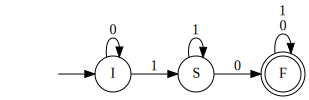

In [9]:
# DFA for Missing_Sublanguage
#
# We just need to find a 10
DFA_for_Missing_Sublanguage = md2mc('''DFA
I : 0 -> I !! loop until we get a 1
I : 1 -> S !! this could be the start of a 10

S : 0 -> F !! we found a 10 and we're good!
S : 1 -> S !! not a 10, but it could be the start of a new 10, so just keep looping

F : 0 -> F !! we already found a 10 so this is accepting
F : 1 -> F
''')
dotObj_dfa(DFA_for_Missing_Sublanguage, FuseEdges="True")



----------------

## Question 2: I'll mention all the parts first, and then give you the spaces to answer your individual parts.

2(a): Using Jove's markdown, define a DFA for the language of strings over alphabet $\{0,1\}$ that ends in a $010$. Call this DFA "DFA_Ends010."

2(b): Now define DFA_Not_Ends010 as a DFA that does not end in 010. Intersect the above DFA and show that the language of the intersection is empty. Apply min_dfa(DFA_Ends010, DFA_Not_Ends010) and observe that the DFA has an empty language.

2(c): Again using Jove's markdown, define a DFA for the language of strings over alphabet $\{0,1\}$  whose numeric value is evenly divisible by 5 (i.e. mod 5 is 0, or N%5 == 0 for the numeric value being N). Call this DFA "DFA_Mod5".

*Note*: **Please consider following the conventions in the book which has such DFA starting at an IF state (epsilon input is tantamount to 0).**. We won't dock points if you don't. But the TAs may like a more standardized answer.

2(d): Intersect these DFA using the command intersect_dfa(DFA_Ends010, DFA_mod5), calling the intersection DFA_Ends010_and_Mod5.

###Part 2(a):
Definition of DFA_Ends010

😃

In [12]:
# Define this DFA, making sure you document it sufficiently (but not excessively)
DFA_Ends010 = md2mc('''DFA
!!! State where we wait for a 0 to start the 010
I     : 0 -> S_0   !! This could be the start of a 010
I     : 1 -> I     !! Otherwise wait

S_0   : 0 -> S_0   !! Breaks the chain, but could start a new one
S_0   : 1 -> S_01  !! Continue

S_01  : 0 -> F_010 !! Continue
S_01  : 1 -> I     !! Breaks the chain and we have to start from scratch

!! This state is accepting because we end in a 010
F_010 : 0 -> S_0   !! 2 0s in a row, could start a new chain
F_010 : 1 -> S_01  !! 0101 ends in a 01, so dont start over
''')



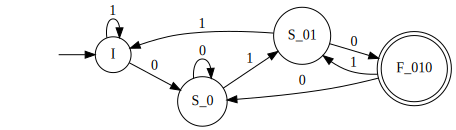

In [13]:
# Let's see the "Ends010" machine
dotObj_dfa(DFA_Ends010, FuseEdges=True)

### 2(b) : A good way to check your work is to define the DFA_Not_Ends010 and intersect to obtain a DFA with an empty language. You can also apply a min_dfa(...) to see the minimized form of the DFA for a quicker check.

😃

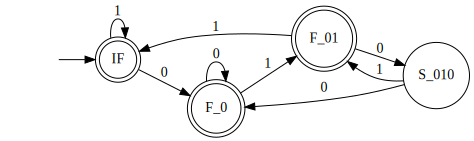

In [14]:
DFA_Not_Ends010 = md2mc('''DFA
!!! In this version, we accept everything UNLESS it ends with a 010
!!! State where we wait for a 0 to start the 010
IF     : 0 -> F_0   !! This could be the start of a 010
IF     : 1 -> IF     !! Otherwise wait

F_0   : 0 -> F_0   !! Breaks the chain, but could start a new one
F_0   : 1 -> F_01  !! Continue

F_01  : 0 -> S_010 !! Continue
F_01  : 1 -> IF     !! Breaks the chain and we have to start from scratch

!! This state is not accepting because we end in a 010
S_010 : 0 -> F_0   !! 2 0s in a row, could start a new chain
S_010 : 1 -> F_01  !! 0101 ends in a 01, so dont start over
''')



dotObj_dfa(DFA_Not_Ends010, FuseEdges=True)


😃

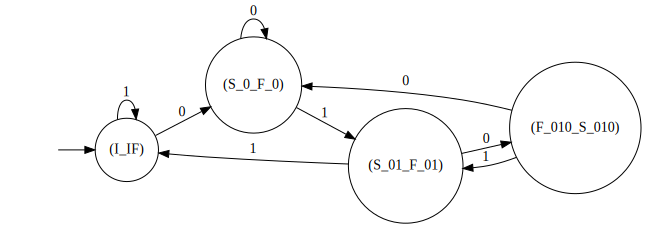

In [16]:
Ends010_and_not_Ends010 = intersect_dfa(DFA_Ends010, DFA_Not_Ends010)
dotObj_dfa(Ends010_and_not_Ends010)

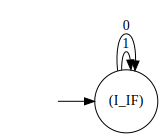

In [17]:
dotObj_dfa(min_dfa(Ends010_and_not_Ends010))

### 2(c). Now try OR of both the languages and get a machine that accepts all strings. Then we know that the machine we designed DFA_Ends010 is much more believable.

😃

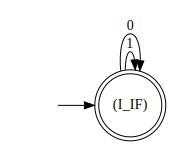

In [18]:
Ends010_or_not_Ends010 = union_dfa(DFA_Ends010, DFA_Not_Ends010)
dotObj_dfa(min_dfa(Ends010_or_not_Ends010))

### At this point we know that our design of DFA_Ends010 is trustworthy.

In [ ]:
# Why is this the case? All I did for NotEnds010 was complement Ends010. If the first is incorrect, it's likely the second would be too because my understanding would have been flawed.

### 2(d). At this point, you are going to obtain more DFA design experience. Define DFA_Mod5, a DFA that accepts any binary sequence whose numeric value is evenly divisible by 5.

Design of the DFA

* Each state remembers the number seen so far, mod 5


😃

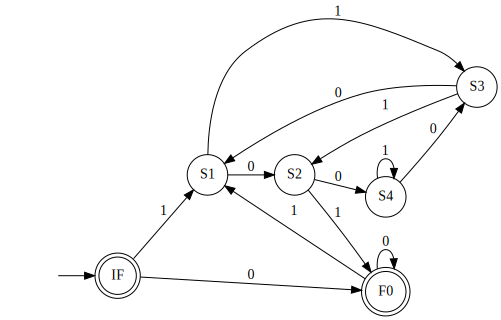

In [19]:
DFA_Mod5 = md2mc('''DFA
!!! Initial state should be accepting, as epsilon is 0.
!!! But it must be distinct from the future mod 0 state.
IF : 0 -> F0
IF : 1 -> S1

!! SN = the state where the value so far is congruent to N (mod 5)
F0 : 0 -> F0 !! i.e. 1010 = 10, 10100 = 20 (0 mod 5)
F0 : 1 -> S1 !! i.e. 1010 = 10, 10101 = 21 (1 mod 5)
!! further states determined in similar ways

S1 : 0 -> S2
S1 : 1 -> S3

S2 : 0 -> S4
S2 : 1 -> F0 !! becomes 5 mod 5 = 0 mod 5

S3 : 0 -> S1
S3 : 1 -> S2

S4 : 0 -> S3
S4 : 1 -> S4
''')
dotObj_dfa(DFA_Mod5, FuseEdges=True)

😃

### Part 2(e)

Compute the intersection of the DFA_Mod5 language with that of DFA_Ends010. This is a language that would have been hard to directly design as a DFA (that being the lesson you obtain)

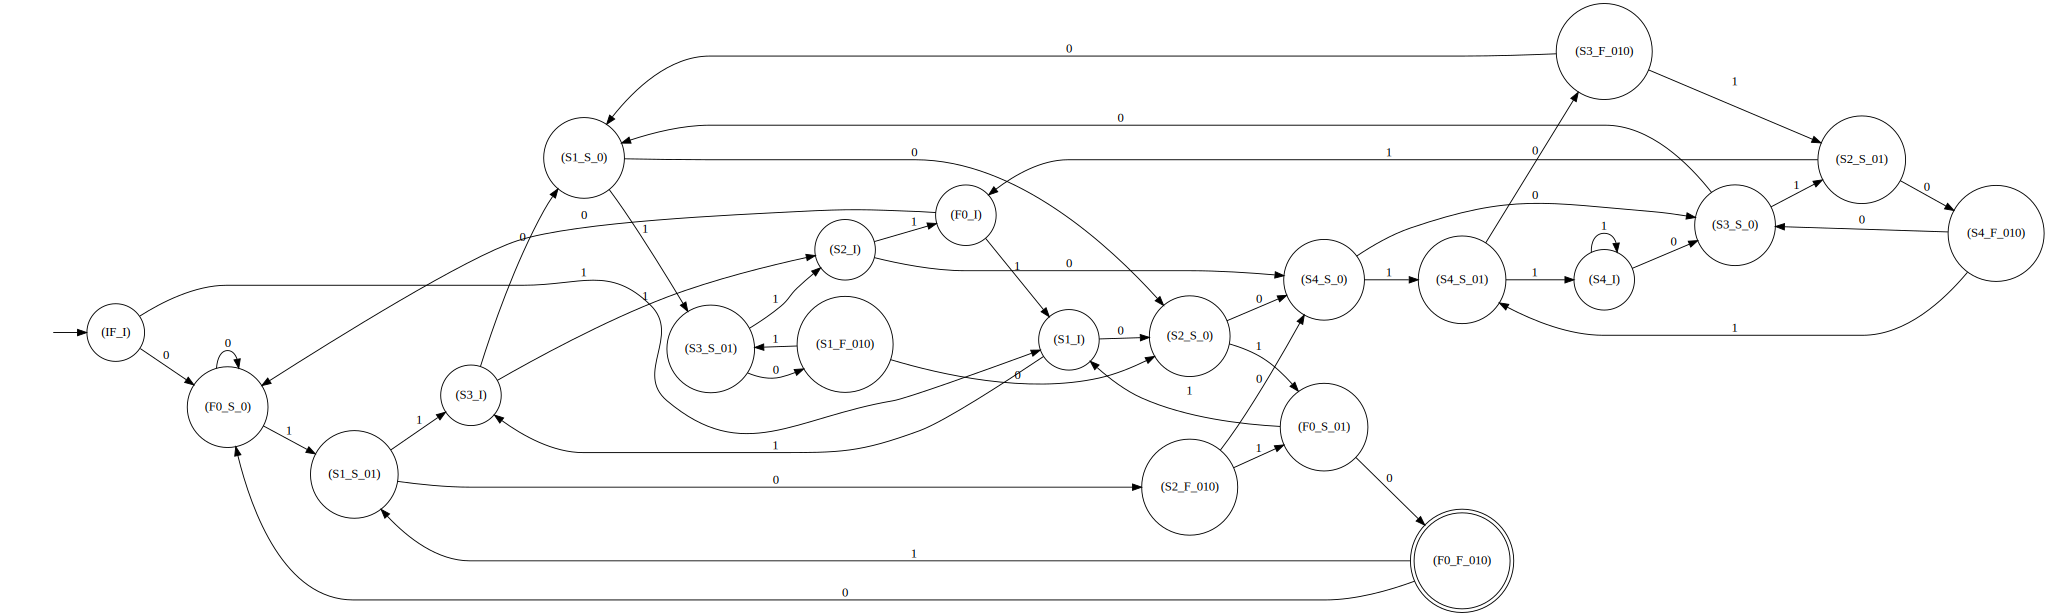

In [26]:
DFA_Mod5_And_Ends010 = intersect_dfa(DFA_Mod5, DFA_Ends010)
dotObj_dfa(DFA_Mod5_And_Ends010, FuseEdges=True)

### 2(f). Wow, this is a large DFA; how many states does it have? Find this out

In [27]:
print('DFA_Mod5_And_Ends010 has', len(DFA_Mod5_And_Ends010['Q']), 'states')

DFA_Mod5_And_Ends010 has 21 states


😃

$21$ states

### 2(g). Minimize this DFA

In [28]:
help(min_dfa)

Help on function min_dfa in module jove.Def_DFA:

min_dfa(D, state_name_mode='succinct', chatty=False)
    The top-level callable DFA minimizer.
    
    In : D (consistent DFA to be minimized)
    Out: Minimized version of D.
    
    Given a DFA D, go through the state minimization algorithm.
    
    Setting chatty=True helps reveal the detailed steps. Please try it!        
    
    If the state_name_mode is verbose, we will make state names
    by stringing together the state names in the equivalence
    classes. If 'succinct', then only the name of the equivalence-class
    representative is retained.



😃

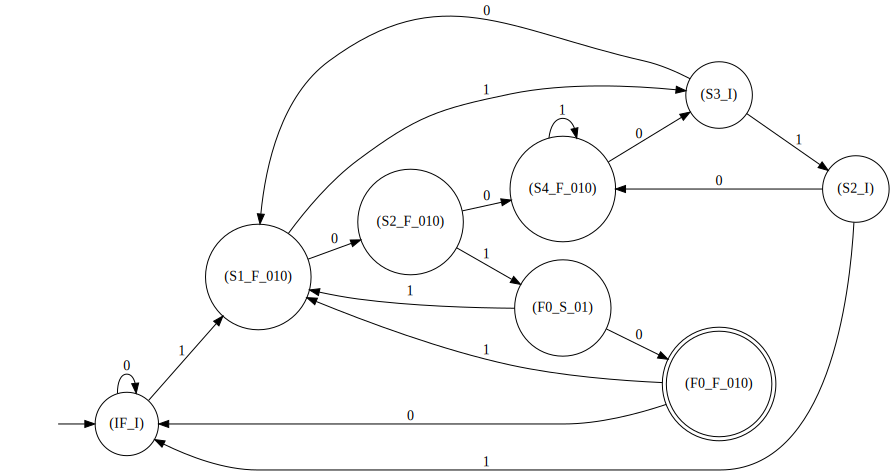

In [29]:
Min_DFA_Mod5_And_Ends010 =  min_dfa(DFA_Mod5_And_Ends010)
dotObj_dfa(Min_DFA_Mod5_And_Ends010, FuseEdges=True)

### 2(h). How many states does the minimized machine have?

😃

In [30]:
print('The minimized machine has', len(Min_DFA_Mod5_And_Ends010['Q']), 'states')

The minimized machine has 8 states


### 2(i). Which states got eliminated?

😃

In [31]:
[ q for q in DFA_Mod5_And_Ends010['Q'] if q not in Min_DFA_Mod5_And_Ends010['Q'] ]

[('S4', 'S_01'),
 ('S3', 'S_01'),
 ('S3', 'S_0'),
 ('S4', 'I'),
 ('S3', 'F_010'),
 ('S2', 'S_0'),
 ('S2', 'S_01'),
 ('F0', 'S_0'),
 ('S1', 'S_01'),
 ('S1', 'S_0'),
 ('F0', 'I'),
 ('S1', 'I'),
 ('S4', 'S_0')]

# END

In [ ]:
# Thank you for the opportunity to redo this assignment.